In [25]:
import numpy as np
import matplotlib.pyplot as plt
from aeons.utils import *
from aeons.regress import *
from aeons.endpoint import *
from aeons.plotting import *
figsettings()

In [284]:
name, samples = get_samples('correlated_3d')
model = EndModel(samples)
true_endpoint = model.true_endpoint()
print(true_endpoint)

26107


In [289]:
iterations = make_iterations(true_endpoint, 25)
dGs, dGs_std = np.zeros(len(iterations)), np.zeros(len(iterations))
for i, iteration in enumerate(iterations):
    points = model.points(iteration).recompute()
    beta = get_beta(points, iteration)
    dG = points.d_G(25, beta=beta)
    dGs[i], dGs_std[i] = dG.mean(), dG.std()

In [290]:
write_to_txt('dGs/dGs_3.txt', [iterations, dGs, dGs_std])

In [291]:
name, samples_6 = get_samples('correlated_6d')
model_6 = EndModel(samples_6)
true_endpoint_6 = model_6.true_endpoint()

name, samples_3 = get_samples('correlated_3d')
model_3 = EndModel(samples_3)
true_endpoint_3 = model_3.true_endpoint()

iterations_6, dGs_6, dGs_6_std = read_from_txt('dGs/dGs_6.txt')
iterations_3, dGs_3, dGs_3_std = read_from_txt('dGs/dGs_3.txt')

In [325]:
ds = np.zeros(len(iterations_6))
for i, ndead in enumerate(iterations_6):
    ndead = int(ndead)
    points = model_6.points(ndead).recompute()
    X = np.exp(points.logX().iloc[ndead:])
    logL = points.logL.iloc[ndead:]
    ds[i] = analytic_lm(logL, X, 1).x

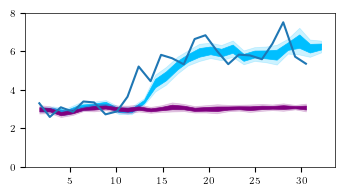

In [326]:
fig, ax = plt.subplots()
logXs_6 = samples_6.logX().iloc[iterations_6]
plot_std(-logXs_6, dGs_6, dGs_6_std, label='6D', ax=ax)

logXs_3 = samples_3.logX().iloc[iterations_3]
plot_std(-logXs_3, dGs_3, dGs_3_std, label='3D', ax=ax, color='purple')
ax.set_ylim(0, 8)
plt.plot(-logXs_3, ds)

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


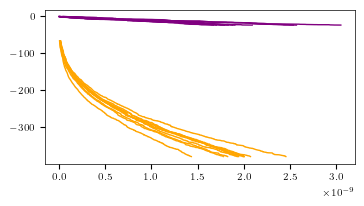

In [360]:
ndead = 15000
points_3, points_6 = model_3.points(ndead).recompute(), model_6.points(ndead).recompute()

logXmin, logXmax = -25, -20
idx3 = (points_3.logX() > logXmin) & (points_3.logX() < logXmax)
idx6 = (points_6.logX() > logXmin) & (points_6.logX() < logXmax)

X3, X6 = np.exp(points_3.logX(10)[idx3]), np.exp(points_6.logX(10)[idx6])
logL3, logL6 = points_3.logL[idx3], points_6.logL[idx6]

plt.plot(X3, logL3, color='purple', lw=1);
plt.plot(X6, logL6, color='orange', lw=1);

In [18]:
# Get element in samples.logX() closest to -2.5
ndead_min = np.argmin(abs(samples.logX() + 2.5))
ndead_max = np.argmin(abs(samples.logX() + 4.5))

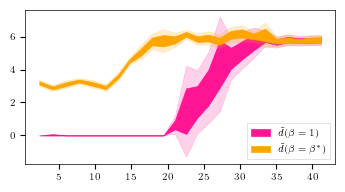

In [113]:
logXs = samples.logX().iloc[iterations]
fig, ax = plt.subplots()
plot_std(-logXs, dGs_all, dGs_all_std, color='deeppink', ax=ax, label=r'$\tilde{d}(\beta = 1)$')
plot_std(-logXs, dGs, dGs_std, color='orange', ax=ax, label=r'$\tilde{d}(\beta = \beta^*)$')
# ax.axvline(-samples.logX().iloc[ndead_min], color='C0', ls='--', lw=1)
# ax.axvline(-samples.logX().iloc[ndead_max], color='C0', ls='--', lw=1)
ax.legend(loc='lower right')

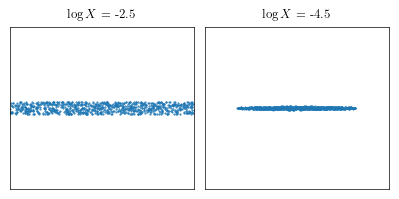

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(4, 2))
for i, ndead in enumerate([ndead_min, ndead_max]):
    ax = axs[i]
    live_points = samples.live_points(ndead)
    ax.plot(live_points[0].values, live_points[1].values, '.', ms=1)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f'$\\log X$ = {samples.logX().iloc[ndead]:.1f}')
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()